In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# wrangle
import acquire
import prepare

# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt, ExponentialSmoothing

# import and explore

In [2]:
df = pd.read_csv('saas.csv')
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [3]:
df.isnull().sum()

Month_Invoiced       0
Customer_Id          0
Invoice_Id           0
Subscription_Type    0
Amount               0
dtype: int64

In [4]:
df.shape

(790458, 5)

In [5]:
df.Subscription_Type.unique()

array([0., 2., 1., 4., 3.])

In [6]:
df.Amount.unique()

array([ 0., 10.,  5., 20., 15.])

In [7]:
df.Month_Invoiced.unique()

array(['2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
       '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
       '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
       '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
       '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
       '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31',
       '2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
       '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
       '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
       '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
       '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
       '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
      dtype=object)

In [8]:
df = prepare.date_to_dt_index(df, 'Month_Invoiced')

In [9]:
df.Subscription_Type != df.Amount *5 

Month_Invoiced
2014-01-31    False
2014-01-31     True
2014-01-31    False
2014-01-31    False
2014-01-31     True
              ...  
2017-12-31    False
2017-12-31    False
2017-12-31     True
2017-12-31    False
2017-12-31    False
Length: 790458, dtype: bool

In [10]:
df_whole=df.copy()

In [11]:
df==df_whole

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,True,True,True,True
2014-01-31,True,True,True,True
2014-01-31,True,True,True,True
2014-01-31,True,True,True,True
2014-01-31,True,True,True,True
...,...,...,...,...
2017-12-31,True,True,True,True
2017-12-31,True,True,True,True
2017-12-31,True,True,True,True


In [12]:
df=df[df.Subscription_Type != 0.0]

In [13]:
df.shape

(294048, 4)

In [14]:
df_whole.shape

(790458, 4)

In [15]:
(df.Subscription_Type != df.Amount *5).value_counts() 

True    294048
dtype: int64

<AxesSubplot:xlabel='Month_Invoiced'>

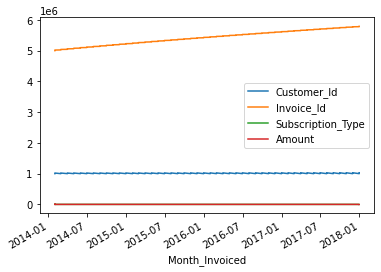

In [16]:
df.plot()

In [17]:
df_whole.Subscription_Type != df_whole.Amount *5 

Month_Invoiced
2014-01-31    False
2014-01-31     True
2014-01-31    False
2014-01-31    False
2014-01-31     True
              ...  
2017-12-31    False
2017-12-31    False
2017-12-31     True
2017-12-31    False
2017-12-31    False
Length: 790458, dtype: bool

<AxesSubplot:xlabel='Month_Invoiced'>

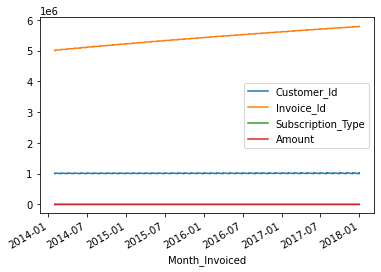

In [18]:
df_whole.plot()

# from this ^ we can see that there is no seasonality

In [19]:
df_whole = df_whole.resample('m')[['Subscription_Type','Amount']].mean()
df_whole

,Subscription_Type,Amount
Month_Invoiced,,
2014-01-31,0.358500,1.792500
2014-02-28,0.375657,1.878283
2014-03-31,0.390785,1.953926
2014-04-30,0.404420,2.022099
2014-05-31,0.419905,2.099527
2014-06-30,0.433396,2.166982
2014-07-31,0.447403,2.237017
2014-08-31,0.462832,2.314160
2014-09-30,0.476641,2.383205


In [20]:
df = df.resample('m')[['Subscription_Type','Amount']].sum()

In [21]:
df

,Subscription_Type,Amount
Month_Invoiced,,
2014-01-31,7170.0,35850.0
2014-02-28,7438.0,37190.0
2014-03-31,7659.0,38295.0
2014-04-30,7851.0,39255.0
2014-05-31,8071.0,40355.0
2014-06-30,8251.0,41255.0
2014-07-31,8434.0,42170.0
2014-08-31,8642.0,43210.0
2014-09-30,8815.0,44075.0


<AxesSubplot:xlabel='Month_Invoiced'>

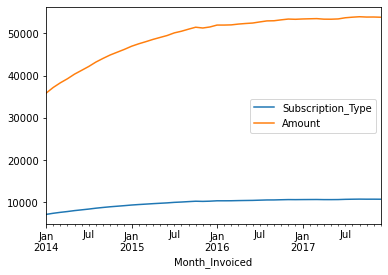

In [22]:
df.plot()

## feb 29, 2016 wont stay dropped. Mark says it wont affect the model

# SPLIT
because there is no seasonality, i'm splitting by arbitray percentage

In [23]:
df.shape

(48, 2)

In [24]:
# set train size to be 50% of total 
train_size = int(round(df.shape[0] * 0.5))
train_size

24

In [25]:
# set validate size to be 30% of total 
validate_size = int(round(df.shape[0] * 0.3))
validate_size

14

In [26]:
# set test size to be number of rows remaining. 
test_size = int(round(df.shape[0] * 0.2))
test_size

10

In [27]:
# validate will go from 913 to 913+548
validate_end_index = train_size + validate_size
validate_end_index

38

In [28]:
train = df[:train_size]

In [29]:
validate = df[train_size:validate_end_index]

In [30]:
train.tail()

,Subscription_Type,Amount
Month_Invoiced,,
2015-08-31,10099.0,50495.0
2015-09-30,10197.0,50985.0
2015-10-31,10289.0,51445.0
2015-11-30,10252.0,51260.0
2015-12-31,10301.0,51505.0


In [31]:
validate.head()

,Subscription_Type,Amount
Month_Invoiced,,
2016-01-31,10391.0,51955.0
2016-02-29,10391.0,51955.0
2016-03-31,10400.0,52000.0
2016-04-30,10438.0,52190.0
2016-05-31,10465.0,52325.0


In [32]:
test = df[validate_end_index:]

In [33]:
#confirming splits
len(train) + len(validate) + len(test) == len(df)

True

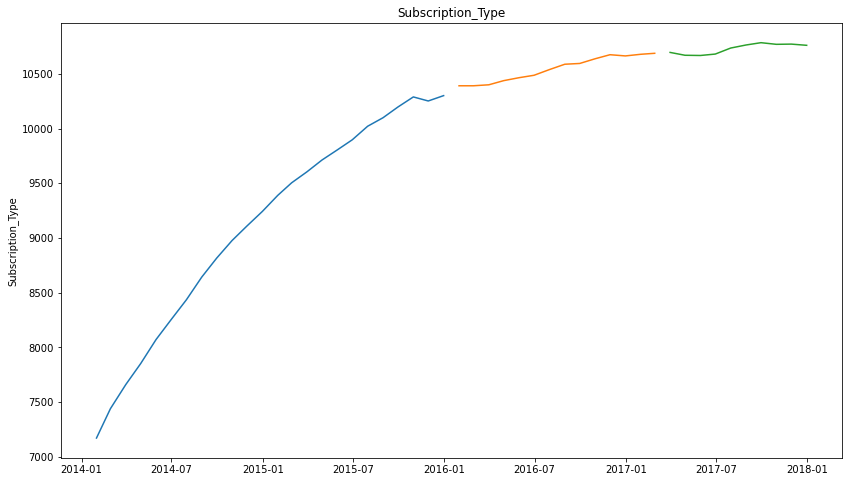

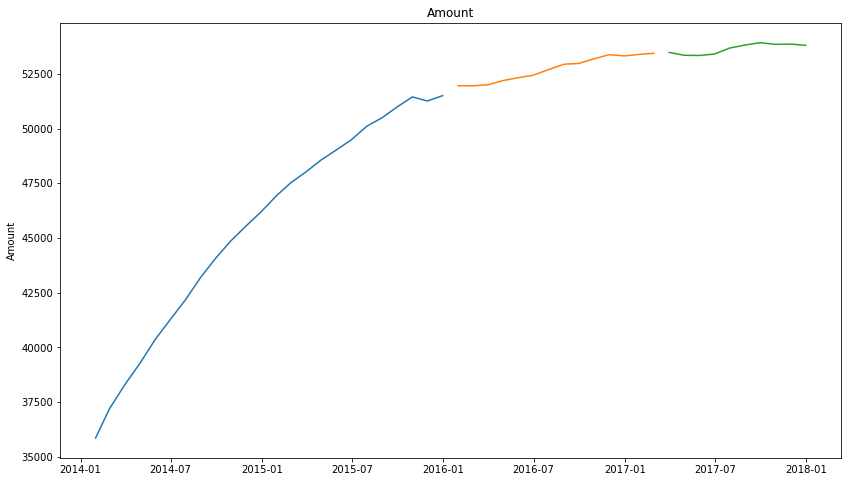

In [34]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [35]:
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    if eval_df == null:
        eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
    else:
    
        rmse = evaluate(target_var)
        d = {'model_type': [model_type], 'target_var': [target_var],
            'rmse': [rmse]}
        d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)